In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df=pd.read_csv("Fast Food Sales - Balaji Fast Food Sales.csv")
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


the column date is having dates in different formats, transaction_amount = item_price*quantity

In [149]:
from datetime import datetime
def standardize_date(date_str):
    for fmt in ("%m/%d/%Y", "%m-%d-%Y"):
        try:
            return datetime.strptime(date_str, fmt).strftime("%Y-%m-%d")
        except ValueError:
            continue
            
df['date'] = [standardize_date(date) for date in df['date']]

In [150]:
# date made of one format 👍

# choosing target variable 
transaction_amount(to predict how much revenue will come from sales)
there can be other taregets also like quantity(if i want to know the most popular item) & item_type(if i want to know what type of food items are sold during different times/by different payment methods) but transaction_amount being the most prominent one

In [151]:
df.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [153]:
df.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [154]:
df.shape

(1000, 10)

In [155]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [156]:
# column with nan values
[columns for columns in df.columns if df[columns].isnull().sum()>0]

['transaction_type']

<Axes: >

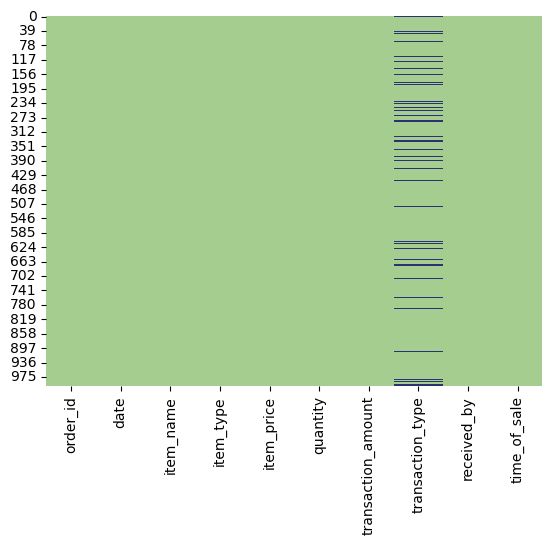

In [157]:
# heatmap (rectangular color encoded matrix) for seeing nan values(df.isnull())
sns.heatmap(df.isnull(),cbar=False,cmap='crest')
# cmap : matplotlib colormap name/object, or list of colors(the mapping from data values to color space)
# cbar : bool(whether to draw a colorbar)

In [158]:
# having missing values in transaction_type, replacing them with the most frequently used type of transaction
df['transaction_type'].fillna(df['transaction_type'].mode()[0], inplace=True)

In [159]:
df.isnull().sum() # no null values in the dataset now 👌

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [160]:
df.dtypes

order_id               int64
date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
received_by           object
time_of_sale          object
dtype: object

In [161]:
df.item_type.value_counts() # getting the different types of items we have in the dataset by two methods

item_type
Fastfood     686
Beverages    314
Name: count, dtype: int64

In [162]:
type_of_items = df.item_type.value_counts().index # method 1

In [163]:
type_of_items

Index(['Fastfood', 'Beverages'], dtype='object', name='item_type')

In [164]:
TypeOfItems = df['item_type'].unique() # method 2

In [165]:
TypeOfItems

array(['Fastfood', 'Beverages'], dtype=object)

In [166]:
type_of_items_values = df.item_type.value_counts().values

([<matplotlib.patches.Wedge at 0x1bee5dff350>,
 [Text(-0.6068104274540275, 0.9174862969729088, 'Fastfood'),
  Text(0.6068104274540274, -0.9174862969729088, 'Beverages')],
 [Text(-0.330987505884015, 0.5004470710761321, '68.60%'),
  Text(0.3309875058840149, -0.5004470710761321, '31.40%')])

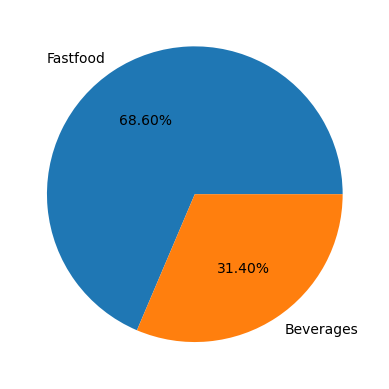

In [196]:
# plotting a pie chart(statistical distribution) for types if items in the dataset
plt.pie(type_of_items_values,labels=type_of_items,autopct='%.2f%%') # method 1

([<matplotlib.patches.Wedge at 0x1bee41f8910>,
 [Text(-0.6068104274540275, 0.9174862969729088, 'Fastfood'),
  Text(0.6068104274540274, -0.9174862969729088, 'Beverages')])

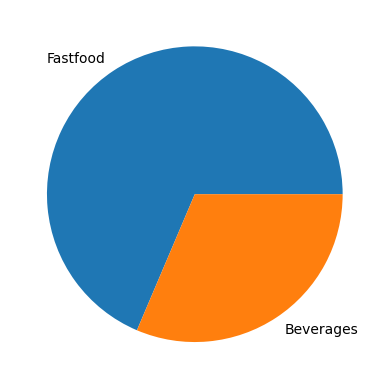

In [168]:
plt.pie(type_of_items_values,labels=TypeOfItems) # method 2

analysis : the above pie chart shows that fastfood is ordered more than beverages from the Balaji Fast Food Sales 

In [169]:
name_of_items = df.item_name.value_counts().index

In [170]:
name_of_items

Index(['Cold coffee', 'Sugarcane juice', 'Panipuri', 'Frankie', 'Aalopuri',
       'Vadapav', 'Sandwich'],
      dtype='object', name='item_name')

In [171]:
number_of_items = df.item_name.value_counts().values

([<matplotlib.patches.Wedge at 0x1bee4222290>,
 [Text(0.5086573906336918, 0.9753295130127685, 'Cold coffee'),
  Text(-1.0969506266736326, -0.08184938998138408, 'Sugarcane juice'),
  Text(0.5798201537170348, -0.9347772939815955, 'Panipuri')],
 [Text(0.27744948580019546, 0.5319979161887828, '34.70%'),
  Text(-0.598336705458345, -0.044645121808027675, '32.97%'),
  Text(0.3162655383911099, -0.5098785239899611, '32.33%')])

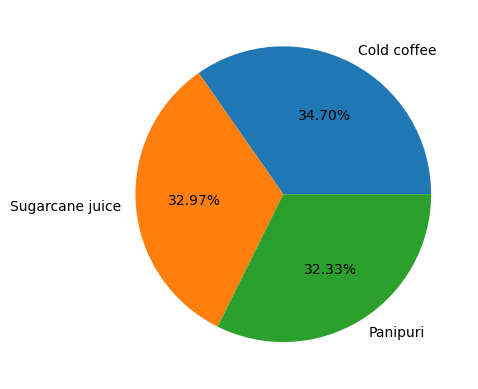

In [172]:
# plotting a pie chart for the top 3 items in dataset along with their percentages
plt.pie(number_of_items[:3],labels=name_of_items[:3],autopct='%.2f%%')
# autopct : default: None, used to label wedges
# The label will be placed inside the wedge
# '%1.2f%%' : gives % of labels upto 2 decimals,1 is optional before .(works same) & if first % is not given the thing before the last two %% is printed as it is

In [173]:
# fractional area of each wedge & the wedges are plotted acw, by default starting from x-axis
number_of_items/sum(number_of_items)

array([0.161, 0.153, 0.15 , 0.139, 0.134, 0.134, 0.129])

analysis : cold coffee is the most demanded item at Balaji Fast Food Sales followed by Sugarcane juice & Panipuri 

# visualizing target : transaction_amount

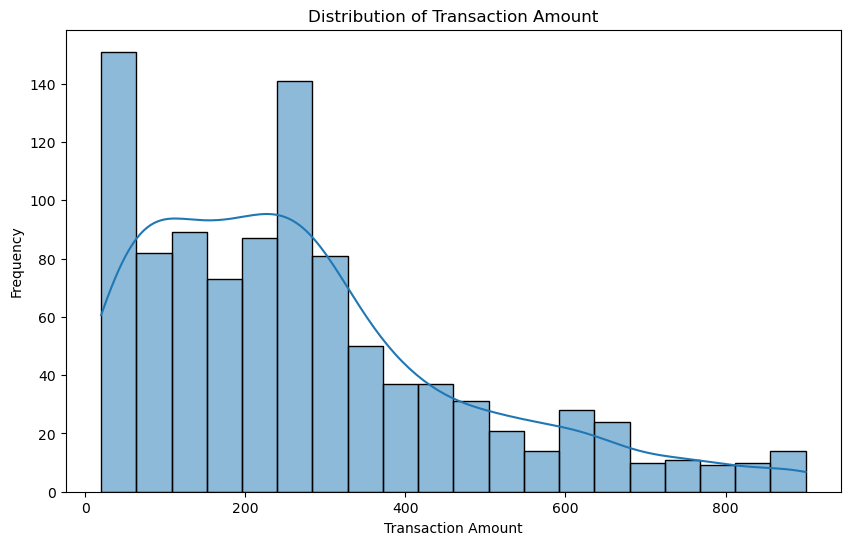

In [174]:
# distribution of the target ---> transaction_amount--->spread of revenue in the dataset
plt.figure(figsize=(10,6))#creates new fig(like canvas to plot on,setting size of fig in inches,10 inches wide & 6 inches tall)
sns.histplot(df['transaction_amount'],bins=20,kde=True)#bins:sets no of intervals into which data is divided,20 controlling granularity of histogram(more bins give finer detail)
#kde=True:adds a kernel density estimate curve over histogram,smoothing it to show distribution shape more clearly(useful when data is spread out)
#kde makes it better to understand overall shape of distribution(whether its skewed or normally distributed)
#normally(symmetirc-bell-shaped-curve,most data around mean)
#skewed(lacks symmetry,tail longer at one side)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')#count of transaction amounts falling into each bin
plt.show()

conclusion : most people did lower transaction, but a few did very high transactions & since tail of curve on right side is longer,its a right/positive skewed distribution

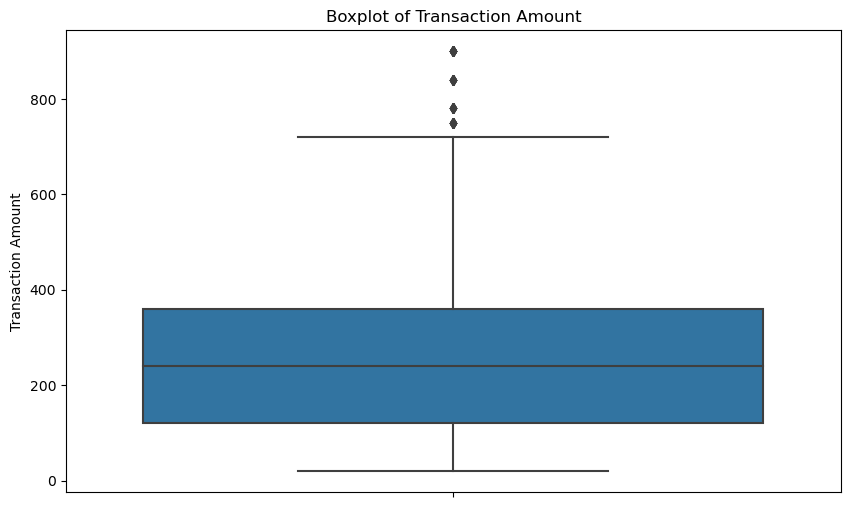

In [175]:
# box plot for identifying outliers in transaction_amount
# outliers are data points falling below Q1-1.5*IQR or above Q3+1.5*IQR
# where 
# Q1=first quartile(25th percentile),where first 25% of data points lie below this value
# Q3=third quartile(75th percentile),where 75% of data points lie below this value
# IQR=interquartile range(b/w Q1 & Q3,middle 50% data)
plt.figure(figsize=(10,6))
sns.boxplot(y=df['transaction_amount'])# using y makes it vertical
plt.title('Boxplot of Transaction Amount')
plt.ylabel('Transaction Amount')
plt.show()

box represents IQR, line inside it-median, whiskers(extending to 1.5*IQR from quartiles) & data points beyond these are potential outliers(amount much higher than bulk in this case indicating unusual transactions(high transactions/rare purchases)=large orders/high quantity purchases/more expensive purchases

In [199]:
Q1 = df['transaction_amount'].quantile(0.25)
Q3 = df['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1 #calculating IQR
upper_bound = Q3 + 1.5 * IQR # outlier range
outliers = df[df['transaction_amount'] > upper_bound ]# rows where outliers are present

# summary stats(exploring by key columns) of outliers for overview

print(outliers[['transaction_amount','quantity','item_type','transaction_type']].describe())

       transaction_amount   quantity
count           44.000000  44.000000
mean           824.318182  14.363636
std             61.204869   0.809562
min            750.000000  13.000000
25%            772.500000  14.000000
50%            840.000000  15.000000
75%            900.000000  15.000000
max            900.000000  15.000000


In [200]:
outliers[['transaction_amount','quantity','item_type','transaction_type']]

,transaction_amount,quantity,item_type,transaction_type
47,840,14,Fastfood,Online
50,750,15,Fastfood,Online
95,900,15,Fastfood,Cash
137,900,15,Fastfood,Online
144,840,14,Fastfood,Online
147,780,13,Fastfood,Online
197,750,15,Fastfood,Cash
269,780,13,Fastfood,Cash
307,780,13,Fastfood,Online
318,750,15,Fastfood,Cash


In [201]:
outliers.shape

(44, 10)

In [202]:
df['quantity'].min(),df['quantity'].max()

(1, 15)

In [204]:
outliers.transaction_type.value_counts()

transaction_type
Cash      27
Online    17
Name: count, dtype: int64

as we can see that these high outliers are associated with large quantities,
only fastfood type of items have higher transaction amounts,
high transaction amounts are done more by cash type transaction # thus the outliers here are representing meaningful transactions

In [181]:
# checking impact of outliers on our analysis
# checking summary stats with and without outliers by calculating mean & standard deviation for transaction_amount with and without outliers

# with outliers
df['transaction_amount'].mean(), df['transaction_amount'].std()

(275.23, 204.4029786418922)

In [182]:
# without outliers
df_without_outliers = df[df['transaction_amount'] <= upper_bound]
df_without_outliers['transaction_amount'].mean(), df_without_outliers['transaction_amount'].std()

(249.9581589958159, 170.31307275166813)

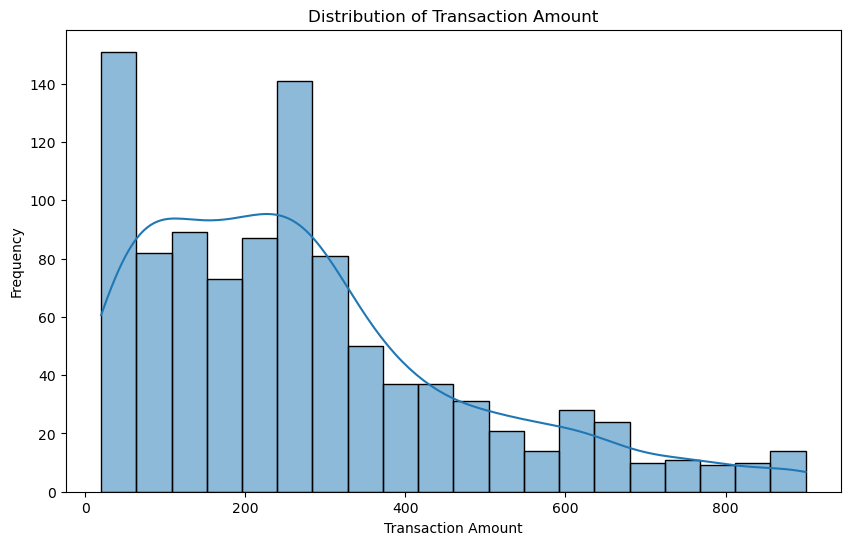

In [183]:
# plotting transaction_amount distribution again without outliers to see if it changes the shape of curve significantly or not

plt.figure(figsize=(10,6))
sns.histplot(df['transaction_amount'],bins=20,kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

also they are less & not affecting our analysis significantly # so keeping them

# analyzing relationships

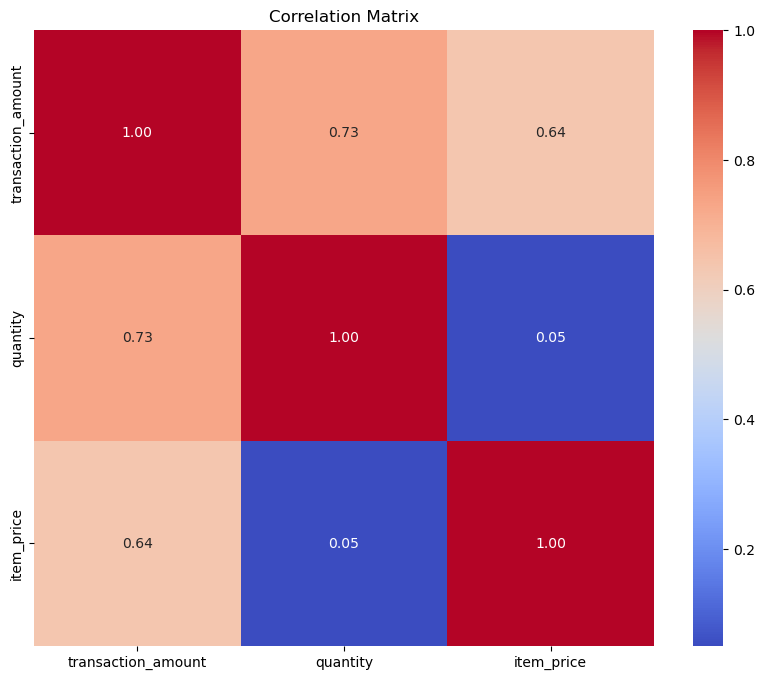

In [184]:
# how transaction_amount is related to other numerical features
correlation_matrix = df[['transaction_amount','quantity','item_price']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f')
# .2f: floating point nos with 2 decimal places, .0f: integers(no decimal places)
plt.title('Correlation Matrix')
plt.show()

now features quantity & item_price are likely good predictors(for steps after eda like modeling) as they are having high correlation with transaction_amount(0.73 & 0.64 respectively)

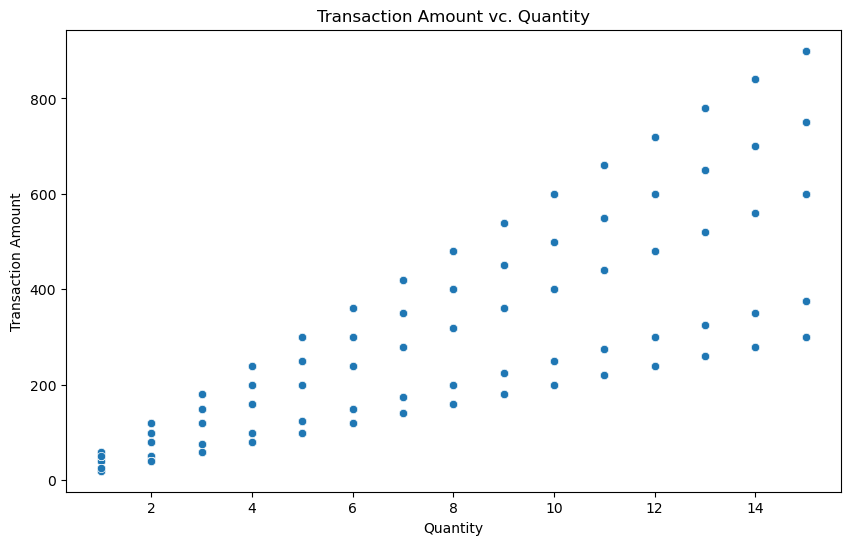

In [185]:
# scatter plot for transaction_amount vs. quantity
plt.figure(figsize=(10,6))
sns.scatterplot(x='quantity', y='transaction_amount', data=df)
plt.title('Transaction Amount vc. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Transaction Amount')
plt.show()

there is a positive trend(upward slope), indicating larger quantities have higher transaction amounts

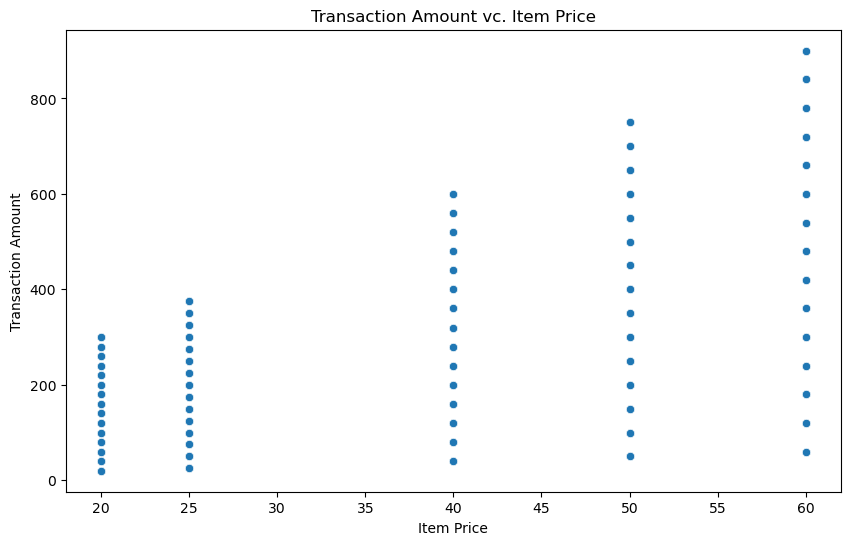

In [186]:
# scatter plot for transaction_amount vs. item_price
plt.figure(figsize=(10,6))
sns.scatterplot(x='item_price', y='transaction_amount', data=df)
plt.title('Transaction Amount vc. Item Price')
plt.xlabel('Item Price')
plt.ylabel('Transaction Amount')
plt.show()

high priced items have higher transaction amounts # item_price(good predictor)

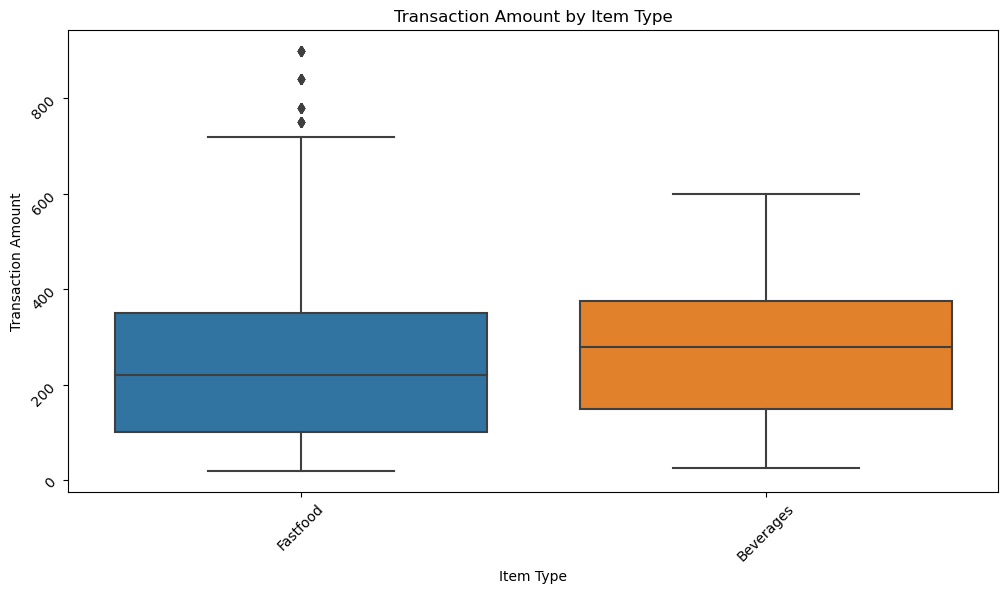

In [187]:
# box plot for transaction_amount by item_type(how transaction_amount varies across different item types)
plt.figure(figsize=(12,6))
sns.boxplot(x='item_type', y='transaction_amount', data=df)
plt.title('Transaction Amount by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

as seen earlier also while detecting outliers in transaction_amount that they are only in fastfood item_type, beverages are having higher median transaction amount(they tend to have higher central transaction values) contributing more to consistent revenue

In [188]:
df_Fastfood = df[df['item_type'] == 'Fastfood']['transaction_amount']

In [189]:
df_Beverages = df[df['item_type'] == 'Beverages']['transaction_amount']

In [190]:
# calculating IQR for both

# for fastfood
Q1_Fastfood = df_Fastfood.quantile(0.25)
Q3_Fastfood = df_Fastfood.quantile(0.75)


In [191]:
IQR_Fastfood = Q3_Fastfood - Q1_Fastfood

In [192]:
# for beverages
Q1_Beverages = df_Beverages.quantile(0.25)
Q3_Beverages = df_Beverages.quantile(0.75)

In [193]:
IQR_Beverages = Q3_Beverages - Q1_Beverages

In [194]:
IQR_Fastfood, IQR_Beverages

(250.0, 225.0)

IQR FOR FAST FOODS IS HIGHER(transaction amounts for them are more spreaded than beverages possibly bcoz there are more fast food items than beverages, so they must be having wider range of prices/orders) which makes them less predictable as some orders maybe small while others be large

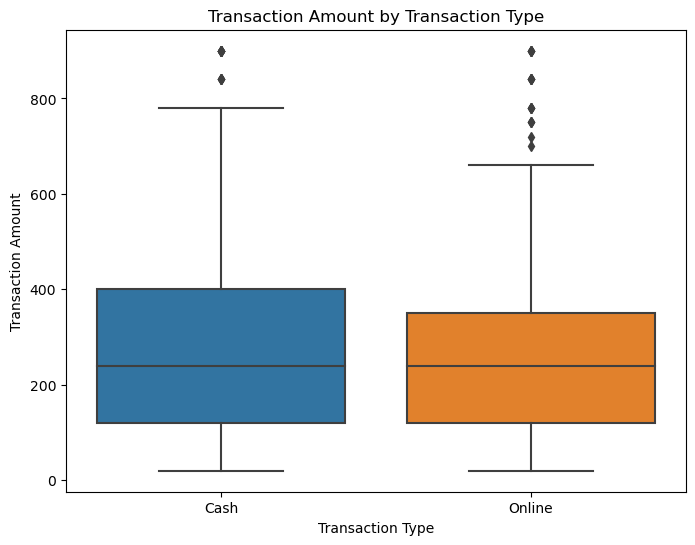

In [195]:
# box plot for transaction_amount by transaction_type(differences in amount based on the mode of transaction)
plt.figure(figsize=(8,6))
sns.boxplot(x='transaction_type', y='transaction_amount', data=df)
plt.title('Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

the median transaction amount remains same b/w cash & online transactions, the box of cash is clearly wider(higher IQR) showing that this type of transaction is associated with more varied(higher)transaction amounts, as seen also at the time of detecting outliers in transaction_amount

but a contradicting thing seems here that earlier when we calculated outliers for the transaction amount, it came to be more in cash but here from this boxplot they seem to be more in online. This is possibly bcoz the online type may have narrower spread causing smaller deviations to be considered outliers in the box plot, leading to more visible points for online in the plot, whereas cash may have wider range, making it harder to visually identify all outliers in the plot.

also a box plot might not display all outliers if there are a large no of them, some plotting libraries only show most extreme ones to avoid cluttering the graph.

In [205]:
# verifying whether there are truly are more outliers in cash or online

df_Cash = df[df['transaction_type'] == 'Cash']
df_Online = df[df['transaction_type'] == 'Online']

In [206]:
def detect_outliers(df, column) :
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [207]:
outliers_Cash = detect_outliers(df_Cash,'transaction_amount')
outliers_Online = detect_outliers(df_Online,'transaction_amount')

In [209]:
outliers_Cash.shape

(14, 10)

In [210]:
outliers_Online.shape

(19, 10)